Applying linear regression to the bike sharing data set.

We want to calculate the number of bikes depending on the season, working day/holiday, etc information we have explored in the Capital Bike Sharing project. Use the historical data, which are the ones with temperature and weather informations.

Use the R2 score and the Mean Square Error (MSE) and/or Mean Absolute Error (MAE) for evaluating your model performance. 

In [34]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.patches as mpatches
from numpy import average
import datetime as dt
from datetime import datetime
from matplotlib.pyplot import figure
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats.stats import pearsonr

# called to counteract dark-mode Jupyter from swallowing axes &c.
plt.style.use('seaborn-whitegrid')

In [69]:
# Import the modiefied core datasets
daily_core = pd.read_csv('data/mod_data/day_mod.csv')
hourly_core = pd.read_csv('data/mod_data/hour_mod.csv')

In [70]:
hourly_core['date_time'] = pd.to_datetime(hourly_core['date_time'])

In [5]:
hourly_core.columns

Index(['date_time', 'instant', 'date_day', 'season', 'year', 'month', 'hour',
       'is_holiday', 'weekday', 'is_workday', 'weather', 'temp', 'temp_feel',
       'humidity', 'windspeed', 'casual', 'registered', 'total_riders',
       'season_name', 'weekday_name', 'weather_desc', 'daytime',
       'daytime_code', 'hour_time', 'cold', 'hot', 'muggy'],
      dtype='object')

In [71]:
hourly_numeric = hourly_core.drop(columns=['instant', 'date_day', 'year', 'is_holiday',\
    'season_name', 'weekday_name', 'weather_desc', 'daytime', 'hour_time'])

In [72]:
correlations = hourly_numeric.corr(method='pearson', min_periods=1).round(3)
#correlations = correlations.unstack()
#correlations = correlations[abs(correlations) >= 0.7]

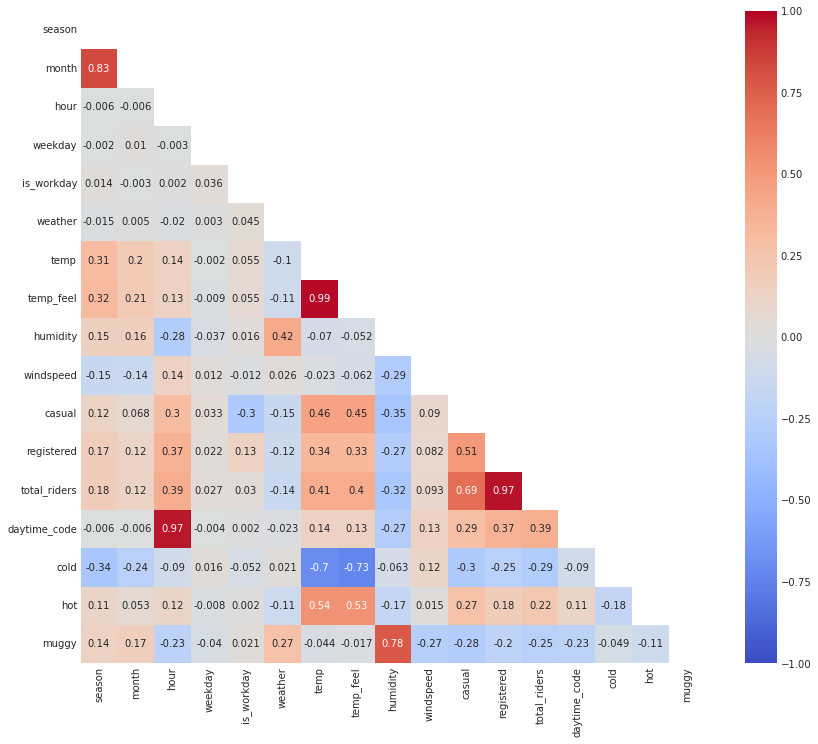

In [73]:
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(correlations, dtype=bool))
heatmap = sb.heatmap(correlations, annot=True, linewidths=0, vmin=-1, vmax=1, center=0, cmap="coolwarm", mask=mask)
fig = heatmap.get_figure();

 0.83  month + season 
 0.99  temp_feel + temp
 0.97  daytime_code + hour
-0.70  cold + temp
-0.73  cold + temp_feel
 0.54  hot + temp
 0.53  hot + temp_feel
 0.78  muggy + humidity
 0.69  total_riders + casual
 0.97  total_riders + registered

Drop hot, cold, muggy, daytime_code, season, temp, total_riders

<hr>

This is where the correlateds are dropped.

In [127]:
hourly_two_riders = hourly_numeric.drop(columns=['hot', 'cold', 'muggy', 'daytime_code', 'season', 'temp', 'total_riders'])
hourly_total_riders = hourly_numeric.drop(columns=['hot', 'cold', 'muggy', 'daytime_code', 'month', 'temp', 'registered', 'casual'])

Text(0.5, 1.0, 'Registered and Casual riders')

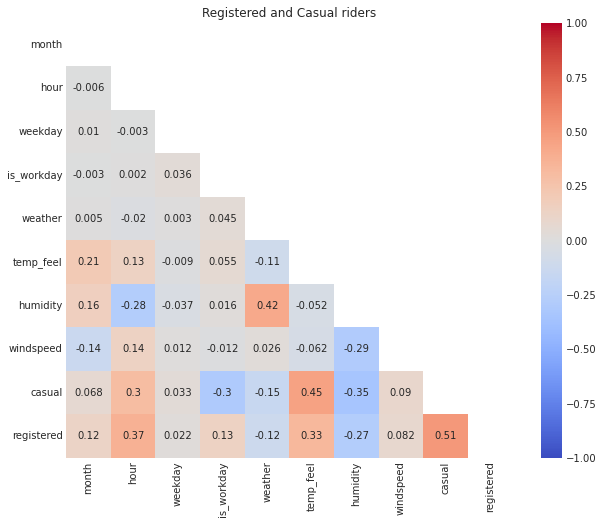

In [78]:
correlations = hourly_two_riders.corr(method='pearson', min_periods=1).round(3)

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlations, dtype=bool))
heatmap = sb.heatmap(correlations, annot=True, linewidths=0, vmin=-1, vmax=1, center=0, cmap="coolwarm", mask=mask)
fig = heatmap.get_figure();
plt.title('Registered and Casual riders')

Text(0.5, 1.0, 'Total riders only')

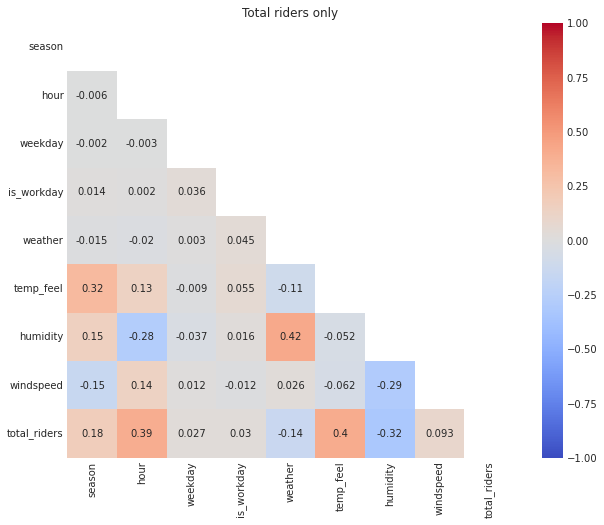

In [98]:
correlations = hourly_total_riders.corr(method='pearson', min_periods=1).round(3)

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlations, dtype=bool))
heatmap = sb.heatmap(correlations, annot=True, linewidths=0, vmin=-1, vmax=1, center=0, cmap="coolwarm", mask=mask)
fig = heatmap.get_figure();
plt.title('Total riders only')

In [102]:
correlations = hourly_total_riders.corr() # default is Pearson coefficient
#print(correlations)
correlations['temp_feel'].round(2)

season          0.32
hour            0.13
weekday        -0.01
is_workday      0.05
weather        -0.11
temp_feel       1.00
humidity       -0.05
windspeed      -0.06
total_riders    0.40
Name: temp_feel, dtype: float64

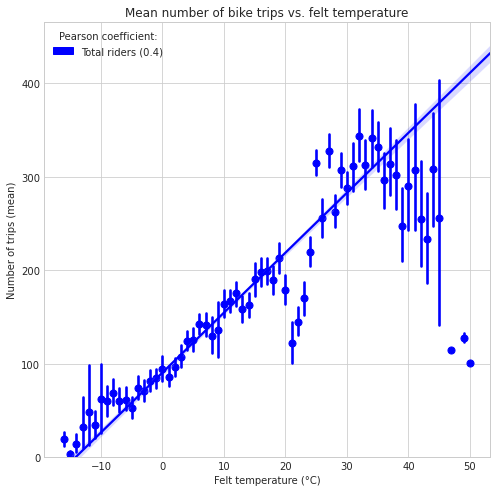

In [105]:
plt.figure(figsize=(8,8))#, dpi=128)
sb.set_style("whitegrid")
s1 = sb.regplot(x='temp_feel', y='total_riders', data=hourly_total_riders, ci=95, truncate=False, x_estimator=np.mean, color='blue')
#s2 = sb.regplot(x='temp_feel', y='casual', data=hourly_core, ci=95, truncate=False, x_estimator=np.mean, color='brown')
plt.ylim(0)
plt.title('Number of cyclists vs. felt temperature')
plt.ylabel('Number of trips (mean)')
plt.xlabel('Felt temperature (°C)')
top_bar = mpatches.Patch(color='blue', label='Total riders (0.4)')
plt.legend(title='Pearson coefficient:', handles=[top_bar], loc='upper left');

In [111]:
# To test if this correlation is statistically significant, we can calculate the p-value associated 
# with the Pearson correlation coefficient by using the Scipy pearsonr() function, which returns 
# the Pearson correlation coefficient along with the two-tailed p-value.
# Returns first the correlation coefficent and second the two-tailed p-value. 
# If p-value is less than 0.5, there is a statistically significant correlation between var1 and var2.

pearsonr(hourly_total_riders.temp_feel, hourly_total_riders.total_riders)

(0.40092930412663313, 0.0)

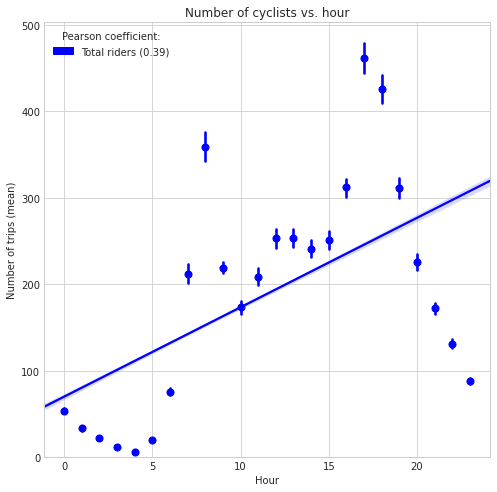

In [106]:
plt.figure(figsize=(8,8))#, dpi=128)
sb.set_style("whitegrid")
s1 = sb.regplot(x='hour', y='total_riders', data=hourly_total_riders, ci=95, truncate=False, x_estimator=np.mean, color='blue')
#s2 = sb.regplot(x='temp_feel', y='casual', data=hourly_core, ci=95, truncate=False, x_estimator=np.mean, color='brown')
plt.ylim(0)
plt.title('Number of cyclists vs. hour')
plt.ylabel('Number of trips (mean)')
plt.xlabel('Hour')
top_bar = mpatches.Patch(color='blue', label='Total riders (0.39)')
plt.legend(title='Pearson coefficient:', handles=[top_bar], loc='upper left');

In [108]:
# To test if this correlation is statistically significant, we can calculate the p-value associated 
# with the Pearson correlation coefficient by using the Scipy pearsonr() function, which returns 
# the Pearson correlation coefficient along with the two-tailed p-value.
# Returns first the correlation coefficent and second the two-tailed p-value. 
# If p-value is less than 0.5, there is a statistically significant correlation between var1 and var2.

pearsonr(hourly_total_riders.hour, hourly_total_riders.total_riders)

(0.39407149778294465, 0.0)

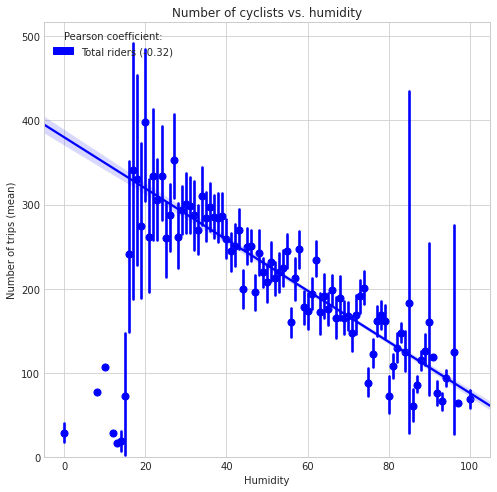

In [107]:
plt.figure(figsize=(8,8))#, dpi=128)
sb.set_style("whitegrid")
s1 = sb.regplot(x='humidity', y='total_riders', data=hourly_total_riders, ci=95, truncate=False, x_estimator=np.mean, color='blue')
#s2 = sb.regplot(x='temp_feel', y='casual', data=hourly_core, ci=95, truncate=False, x_estimator=np.mean, color='brown')
plt.ylim(0)
plt.title('Number of cyclists vs. humidity')
plt.ylabel('Number of trips (mean)')
plt.xlabel('Humidity')
top_bar = mpatches.Patch(color='blue', label='Total riders (-0.32)')
plt.legend(title='Pearson coefficient:', handles=[top_bar], loc='upper left');

In [112]:
# To test if this correlation is statistically significant, we can calculate the p-value associated 
# with the Pearson correlation coefficient by using the Scipy pearsonr() function, which returns 
# the Pearson correlation coefficient along with the two-tailed p-value.
# Returns first the correlation coefficent and second the two-tailed p-value. 
# If p-value is less than 0.5, there is a statistically significant correlation between var1 and var2.

pearsonr(hourly_total_riders.humidity, hourly_total_riders.total_riders)

(-0.3229107408245598, 0.0)

In [56]:
hourly_core.head()

,date_time,month,hour,weekday,is_workday,weather,temp_feel,humidity,windspeed,casual,registered
0,2011-01-01 00:00:00,1,0,6,0,1,3.0014,81.0,0.0,3,13
1,2011-01-01 01:00:00,1,1,6,0,1,1.9982,80.0,0.0,8,32
2,2011-01-01 02:00:00,1,2,6,0,1,1.9982,80.0,0.0,5,27
3,2011-01-01 03:00:00,1,3,6,0,1,3.0014,75.0,0.0,3,10
4,2011-01-01 04:00:00,1,4,6,0,1,3.0014,75.0,0.0,0,1


In [132]:
hourly_total_riders = hourly_total_riders.set_index('date_time', inplace=False)
#hourly_two_riders = hourly_two_riders.set_index('date_time', inplace=False)

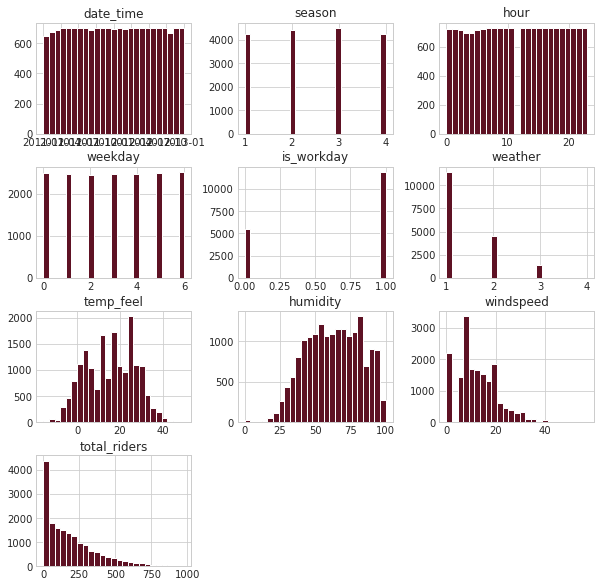

In [128]:
hourly_total_riders.hist(bins=25, figsize=(10,10), color='#5e1224');

In [122]:
# # Apply log transform to right-skewed values
# # fixes outliers

# def log_transform(col):
#     return np.log(col[0])

# hourly_total_riders['windspeed'] = hourly_total_riders[['windspeed']].apply(log_transform, axis=1)
# hourly_total_riders['total_riders'] = hourly_total_riders[['total_riders']].apply(log_transform, axis=1)

/tmp/ipykernel_5680/3561368323.py:5: RuntimeWarning: divide by zero encountered in log
  return np.log(col[0])


<hr>

Training sets

In [133]:
# train test split
test_size = 5214 # (approx 30% of the dataset)

df_train = hourly_total_riders[:-test_size]
df_test = hourly_total_riders[-test_size:]

y_train = df_train['total_riders']
X_train = df_train.drop(columns=['total_riders'])

y_test = df_test['total_riders']
X_test = df_test.drop(columns=['total_riders'])

<AxesSubplot:xlabel='date_time'>

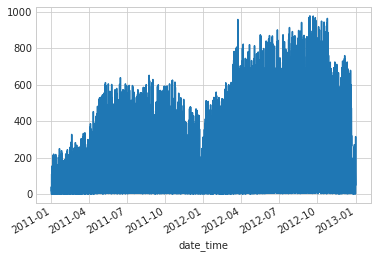

In [134]:
hourly_total_riders['total_riders'].plot()


In [135]:
# instantiate linear regression model
regr = LinearRegression()

regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

In [119]:
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [ 1.3118279   6.44184175  1.68477404  1.79172794 -5.69658966  4.829924
 -1.61545903  0.27811555]
Mean squared error: 39462.41
Coefficient of determination: 0.19


In [136]:
y_pred = regr.predict(X_train)

print(r2_score(y_train, y_pred))

print(regr.score(X_test, y_test))


0.32759777743407437
0.18743990076895822


In [88]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

LDA: 0.008442 (0.001550)
KNN: 0.011716 (0.000967)
CART: 0.023810 (0.004547)
NB: 0.006002 (0.001297)
SVM: 0.005192 (0.000787)


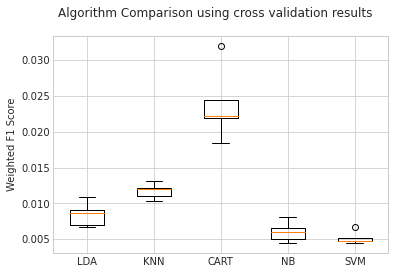

In [95]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
#models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'f1_weighted'

for name, model in models:

	kfold = model_selection.KFold(n_splits=5, random_state=seed, shuffle=True)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)

	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison using cross validation results')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_ylabel('Weighted F1 Score')
ax.set_xticklabels(names)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report

model = DecisionTreeClassifier() ### Best Model

model.fit(X_train, y_train)
  
y_pred = model.predict(X_test)

#### Evaluation metrics ####

# # Confusion Matrix
# cm = confusion_matrix(y_test, y_pred)

# disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
# disp.plot()
# plt.show()

# # Accuracy 
# print('Accuracy Score: ', accuracy_score(y_test,y_pred))

# # Balanced Accuracy
# print('Balanced Accuracy Score: ', balanced_accuracy_score(y_test, y_pred))

# Classification Report 
print(classification_report(y_test, y_pred))

# Kappa score 
kappa = cohen_kappa_score(y_test, y_pred)
print("Cohen-Kappa score:", kappa)

              precision    recall  f1-score   support

           1       0.04      0.11      0.06         9
           2       0.10      0.22      0.13        18
           3       0.08      0.12      0.10        32
           4       0.03      0.05      0.04        38
           5       0.07      0.07      0.07        68
           6       0.12      0.19      0.15        59
           7       0.09      0.11      0.10        54
           8       0.14      0.13      0.14        61
           9       0.05      0.02      0.03        46
          10       0.04      0.04      0.04        53
          11       0.06      0.04      0.04        56
          12       0.06      0.08      0.07        39
          13       0.03      0.03      0.03        35
          14       0.10      0.07      0.08        28
          15       0.03      0.04      0.03        26
          16       0.03      0.03      0.03        29
          17       0.00      0.00      0.00        21
          18       0.17    

/home/jessica/anaconda3/envs/CABerlin/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jessica/anaconda3/envs/CABerlin/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jessica/anaconda3/envs/CABerlin/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(res